In [13]:
import numpy as np
import pandas as pd

In [14]:
PlayTennis=pd.read_csv('play_tennis.csv')
PlayTennis

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [30]:
PlayTennis.dtypes

outlook     int64
temp        int64
humidity    int64
wind        int64
play        int64
dtype: object

In [29]:
PlayTennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int64
 1   temp      14 non-null     int64
 2   humidity  14 non-null     int64
 3   wind      14 non-null     int64
 4   play      14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [16]:
PlayTennis.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [17]:
PlayTennis.drop(['day'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['wind'] = Le.fit_transform(PlayTennis['wind'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [33]:
X = PlayTennis.drop(['play'],axis=1)
y= PlayTennis['play']
print(X)
print("-------------")
print(y)

    outlook  temp  humidity  wind
0         2     1         0     1
1         2     1         0     0
2         0     1         0     1
3         1     2         0     1
4         1     0         1     1
5         1     0         1     0
6         0     0         1     0
7         2     2         0     1
8         2     0         1     1
9         1     2         1     1
10        2     2         1     0
11        0     2         0     0
12        0     1         1     1
13        1     2         0     0
-------------
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

In [21]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (4, 4)
X_test:  (10, 4)
y_train:  (4,)
y_test:  (10,)


In [22]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion = 'entropy')
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy')

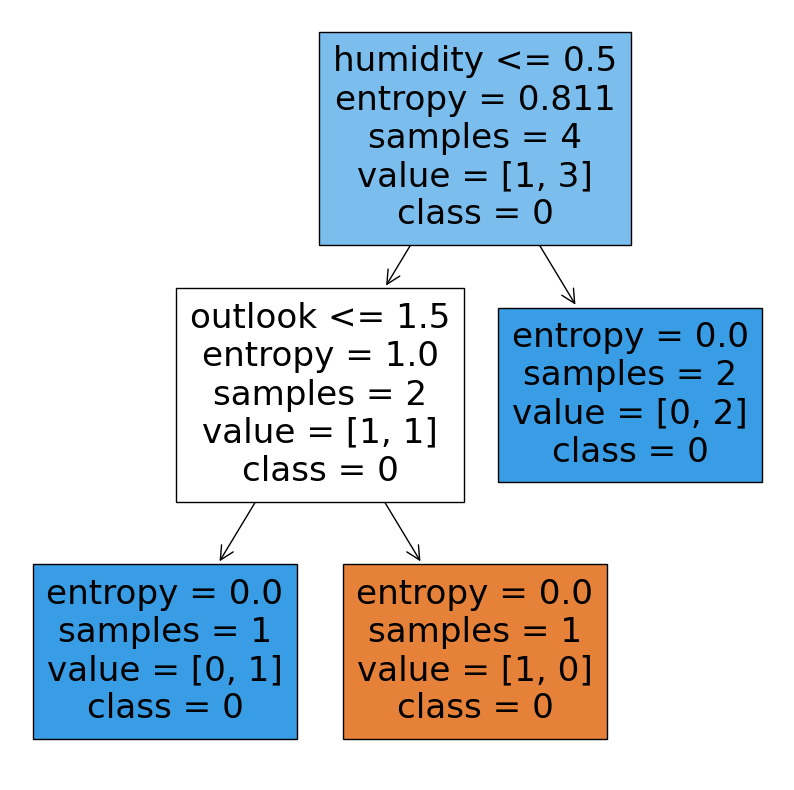

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
a= tree.plot_tree(dt,feature_names=X.columns,class_names=y.astype(str),filled=True)

In [24]:
dt.score(X_test,y_test)

0.8